In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [21]:
pd.set_option('display.max_columns', None)
fin = pd.read_csv('merge_all.csv')

In [22]:
display(fin.info())
display(fin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58427 entries, 0 to 58426
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOIN_SN         58427 non-null  int64  
 1   POL_SN          58427 non-null  int64  
 2   CT_RLPS_GBN_CD  58427 non-null  object 
 3   GENDER          58427 non-null  int64  
 4   AGE             58427 non-null  int64  
 5   AGE_GROUP       58427 non-null  int64  
 6   reduce_GBN_CD   58427 non-null  int64  
 7   reduce_STAT_CD  58427 non-null  int64  
 8   YM_202006       58427 non-null  int64  
 9   CT_CHNL_CD      58427 non-null  int64  
 10  CT_PY_AMT       58427 non-null  int64  
 11  CT_PY_CYCLE_CD  58427 non-null  int64  
 12  CT_PY_PD        58427 non-null  int64  
 13  mean_AMT        58427 non-null  float64
 14  month_AMT       58427 non-null  float64
 15  z_score         58427 non-null  float64
 16  m_z_score       58427 non-null  float64
 17  GBN_CD_1        58427 non-null 

None

,JOIN_SN,POL_SN,CT_RLPS_GBN_CD,GENDER,AGE,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,YM_202006,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,month_AMT,z_score,m_z_score,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,902434,8,C,1,29,2,5,1,1,1,35,2,15,35.0,35.0,-0.036977,-0.035377,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1667175,111,C,2,42,4,1,1,1,3,60,2,25,60.0,60.0,-0.030098,-0.028465,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,594950,179,C,1,45,4,1,1,1,1,330,2,20,330.0,330.0,0.044197,0.046178,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1388667,722,C,2,20,2,3,1,1,1,28,2,30,28.0,28.0,-0.038903,-0.037312,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,453567,1031,C,2,54,5,2,1,1,6,29,2,20,29.0,29.0,-0.038628,-0.037035,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [23]:
drop_col = ['JOIN_SN', 'AGE', 'CT_RLPS_GBN_CD', 'POL_SN', 'reduce_GBN_CD', 'reduce_STAT_CD', 'YM_202006', 'CT_CHNL_CD', 
            'CT_PY_PD', 'z_score', 'm_z_score']

fin = fin.drop(columns=drop_col)
fin.head()

,GENDER,AGE_GROUP,CT_PY_AMT,CT_PY_CYCLE_CD,mean_AMT,month_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,1,2,35,2,35.0,35.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2,4,60,2,60.0,60.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,4,330,2,330.0,330.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,2,2,28,2,28.0,28.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
4,2,5,29,2,29.0,29.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
fin_not0 = fin[fin['총지급 건수'] != 0]
fin_not0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6230 entries, 8 to 58410
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          6230 non-null   int64  
 1   AGE_GROUP       6230 non-null   int64  
 2   CT_PY_AMT       6230 non-null   int64  
 3   CT_PY_CYCLE_CD  6230 non-null   int64  
 4   mean_AMT        6230 non-null   float64
 5   month_AMT       6230 non-null   float64
 6   GBN_CD_1        6230 non-null   int64  
 7   GBN_CD_2        6230 non-null   int64  
 8   GBN_CD_3        6230 non-null   int64  
 9   GBN_CD_4        6230 non-null   int64  
 10  총지급금액           6230 non-null   int64  
 11  총지급 건수          6230 non-null   int64  
 12  기타              6230 non-null   int64  
 13  배책              6230 non-null   int64  
 14  사망/후유           6230 non-null   int64  
 15  수술/입원           6230 non-null   int64  
 16  실손              6230 non-null   int64  
 17  자동차             6230 non-null   int64

## Clustering

In [25]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(fin_not0)

fin_not0['군집'] = kmeans.labels_

C:\Users\LOVE\AppData\Local\Temp\ipykernel_19012\754075038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_not0['군집'] = kmeans.labels_


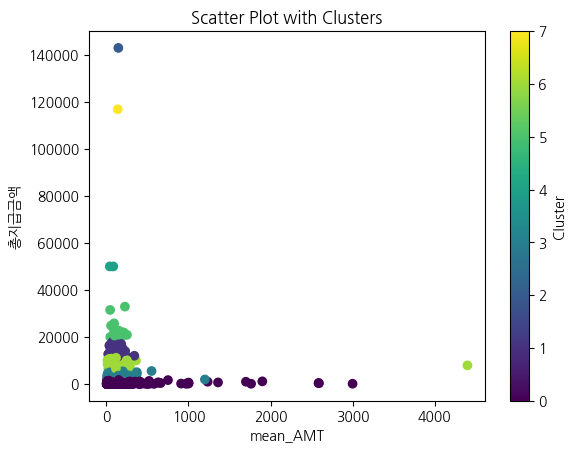

In [26]:
plt.scatter(fin_not0['mean_AMT'], fin_not0['총지급금액'], c=fin_not0['군집'], cmap='viridis')
plt.title('Scatter Plot with Clusters')
plt.xlabel('mean_AMT')
plt.ylabel('총지급금액')
plt.colorbar(label='Cluster')
plt.show()

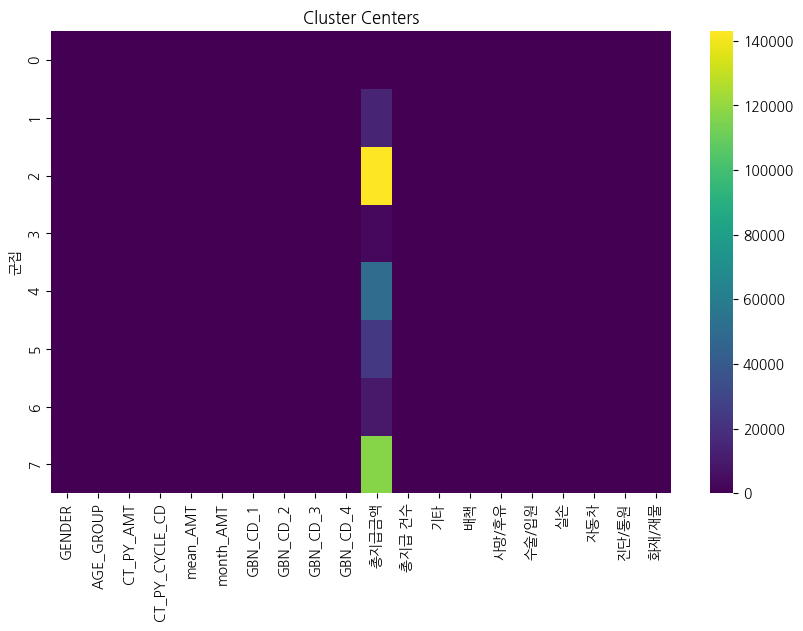

In [27]:
cluster_centers = fin_not0.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

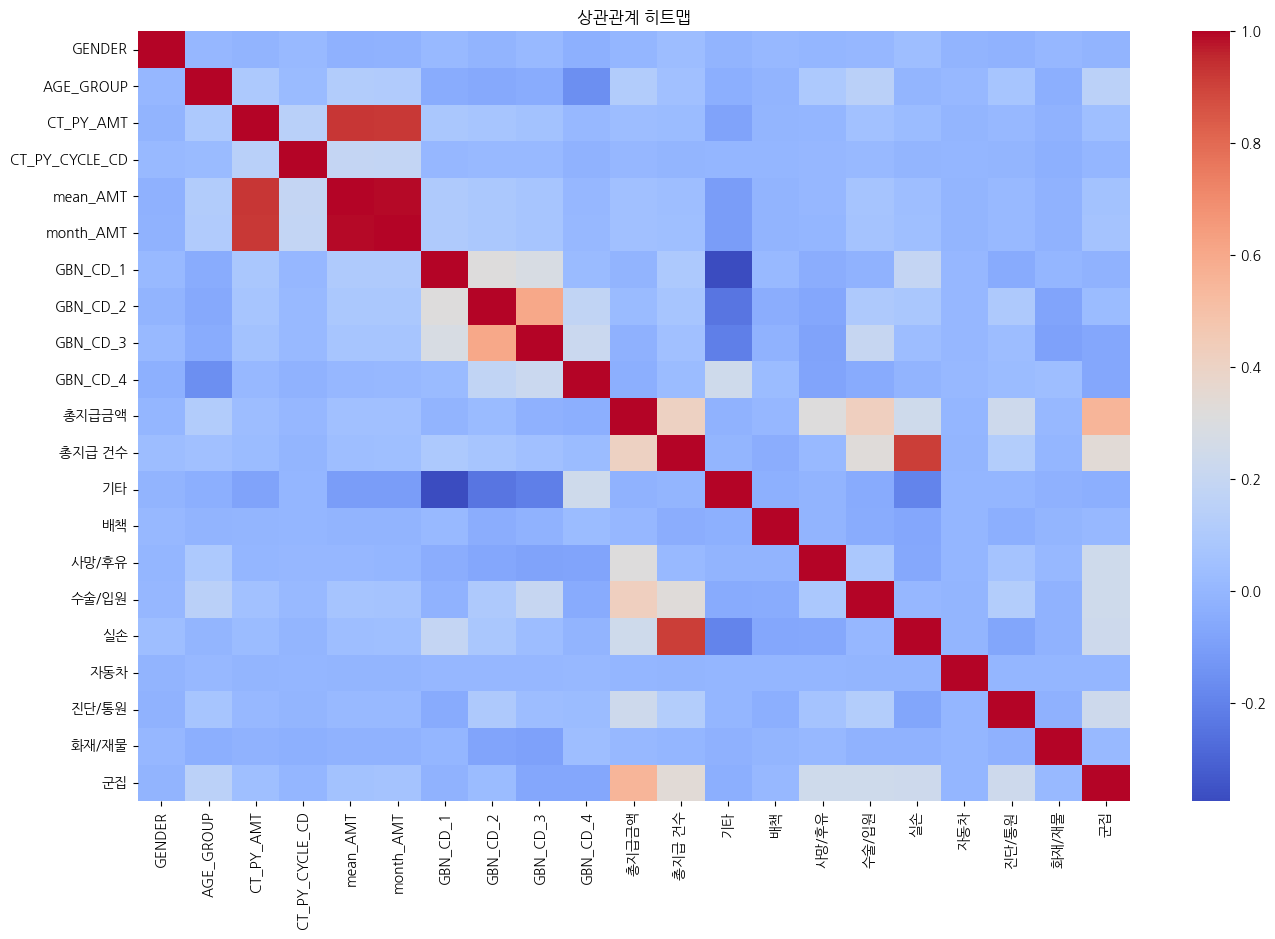

In [28]:
plt.figure(figsize=(16, 10))
sns.heatmap(fin_not0.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')
plt.show()

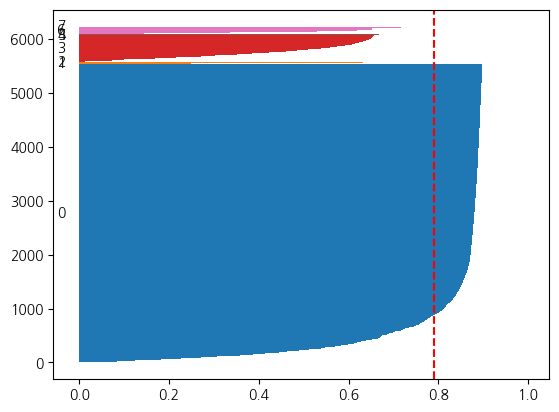

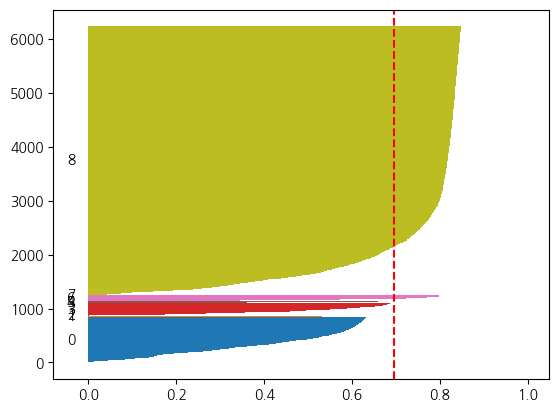

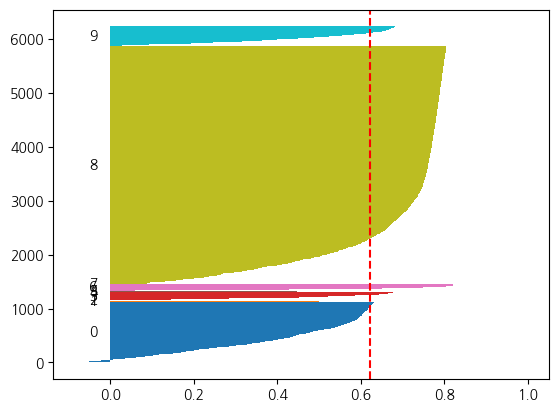

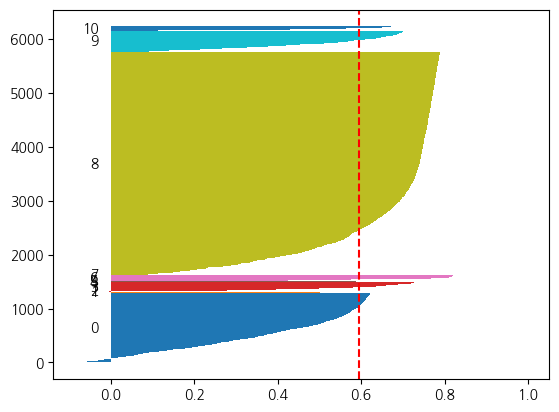

In [30]:
for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(fin_not0)
    silhouette_vals = silhouette_samples(fin_not0, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)
    
    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

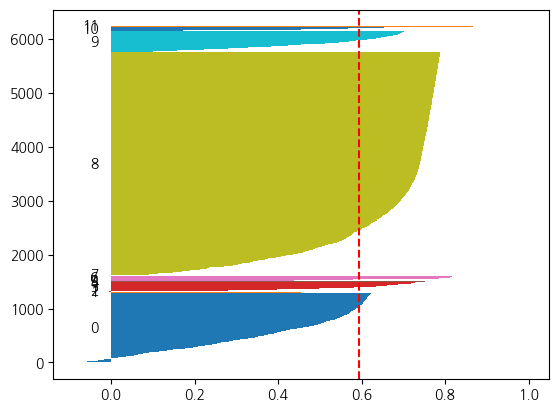

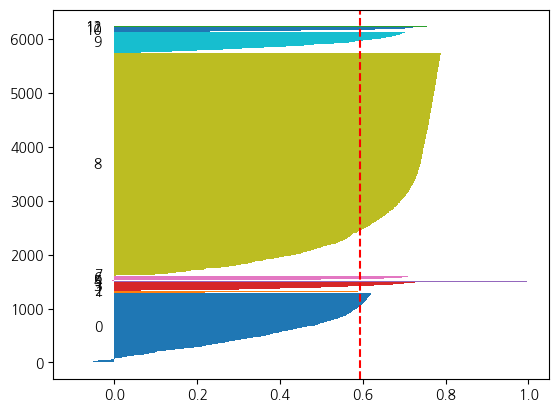

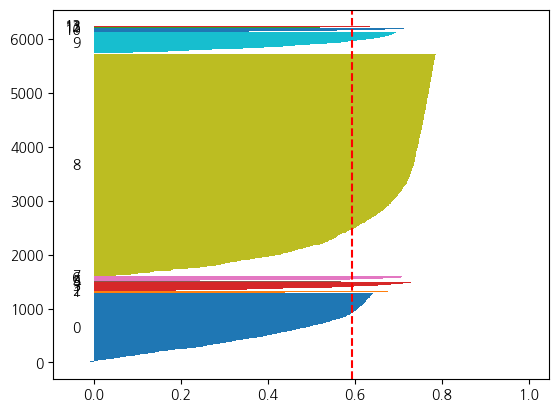

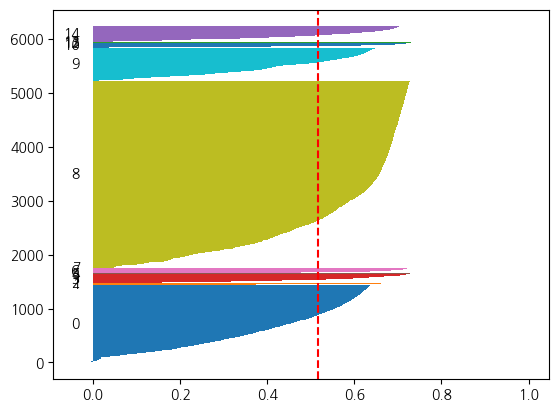

In [33]:
for k in range(12, 16):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(fin_not0)
    silhouette_vals = silhouette_samples(fin_not0, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)
    
    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

## 코사인 거리

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
fin_not0_2 = fin[fin['총지급 건수']!=0]
fin_not0_2.head()

,GENDER,AGE_GROUP,CT_PY_AMT,CT_PY_CYCLE_CD,mean_AMT,month_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
8,1,4,96,2,90.0,90.000000,1,1,1,0,2026,9,0,0,0,0,9,0,0,0
9,2,5,210,2,210.0,210.000000,1,1,1,0,5930,12,0,0,0,6,6,0,0,0
10,1,3,65,2,64.0,64.000000,1,1,1,1,77,1,0,0,0,0,1,0,0,0
30,1,7,140,3,140.0,11.666667,1,1,1,0,17,1,0,0,0,0,1,0,0,0
34,1,3,53,2,53.0,53.000000,1,1,1,0,63,1,0,0,0,1,0,0,0,0


In [38]:
cosine_sim = cosine_similarity(fin_not0_2)

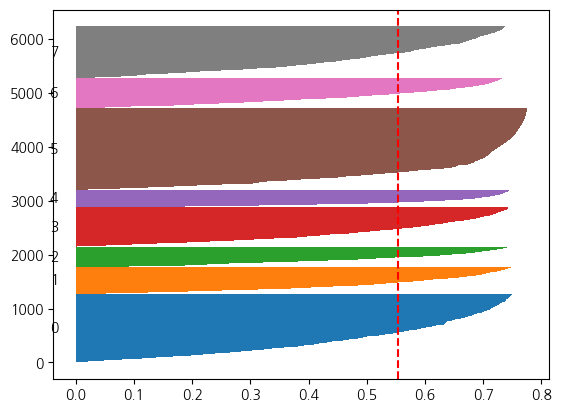

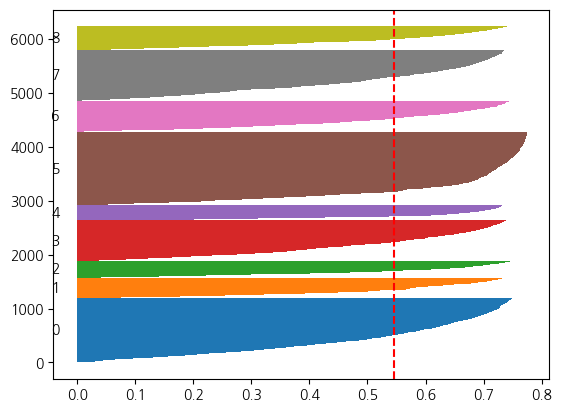

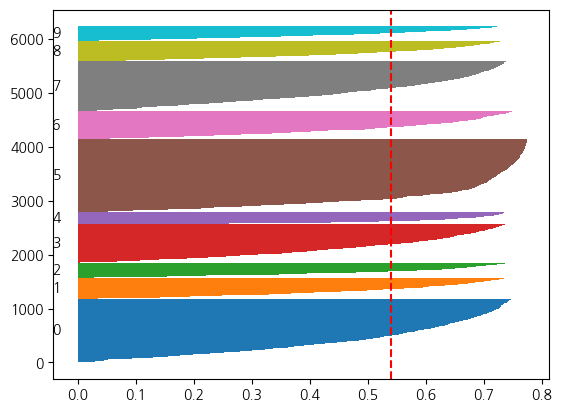

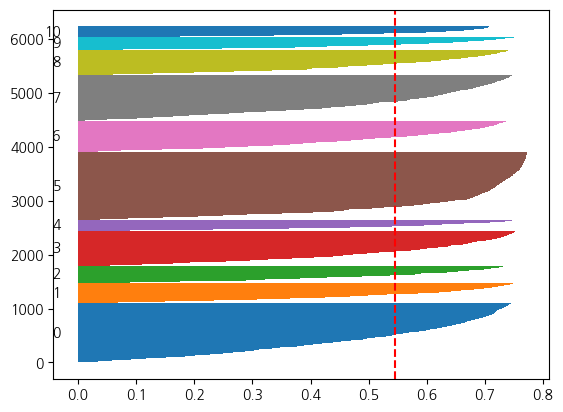

In [40]:
for k in range(8, 12):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)
    
    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

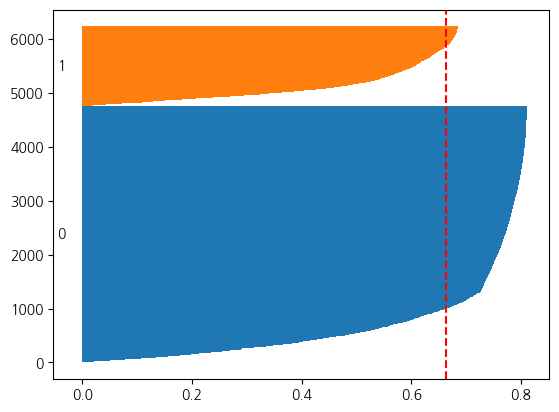

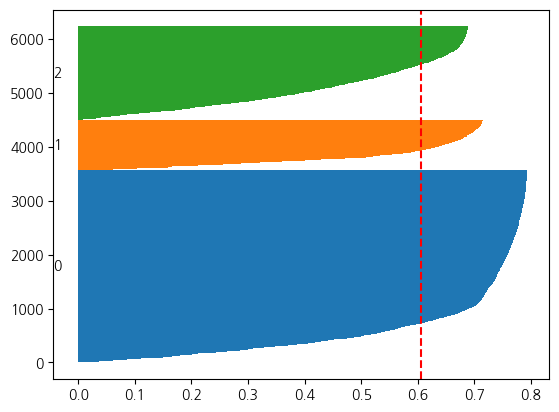

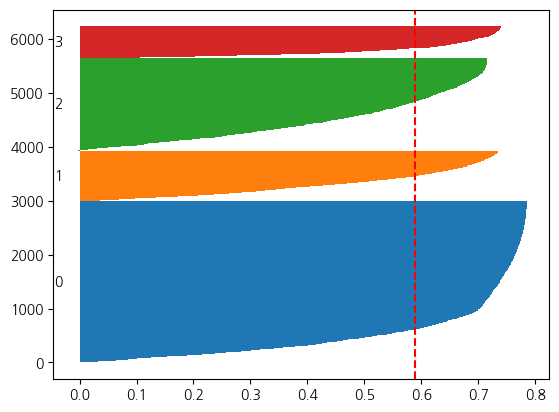

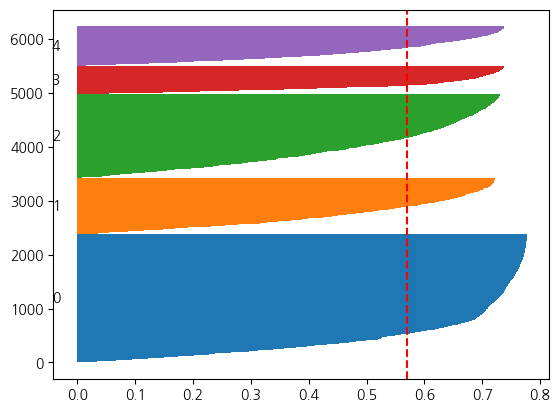

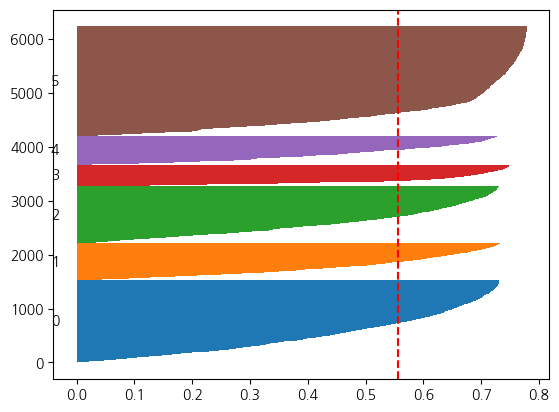

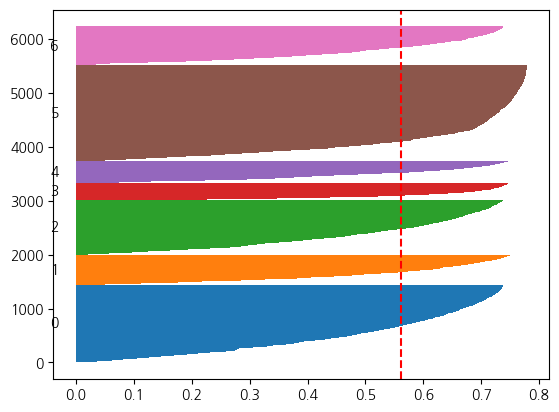

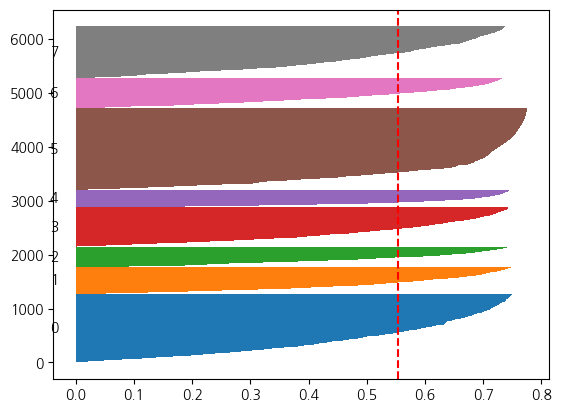

In [41]:
for k in range(2, 9):
    fig, ax = plt.subplots(1, 1)
    kmeans2 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim)
    silhouette_vals = silhouette_samples(cosine_sim, kmeans2.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans2.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans2.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)
    
    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [43]:
cosine_sim_5cluster = cosine_similarity(fin_not0_2)
kmeans_5cluster = KMeans(n_clusters=5, random_state=42)
kmeans_5cluster.fit(cosine_sim_5cluster)

clusters_5 = kmeans_5cluster.labels_
fin_not0_2['군집'] = clusters_5

C:\Users\LOVE\AppData\Local\Temp\ipykernel_19012\2566454482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_not0_2['군집'] = clusters_5


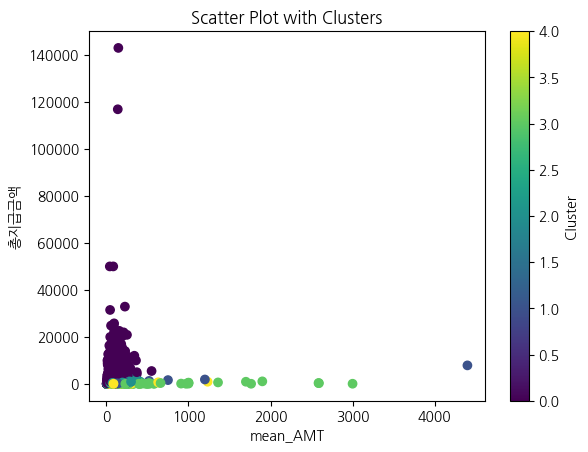

In [44]:
plt.scatter(fin_not0_2['mean_AMT'], fin_not0_2['총지급금액'], c=fin_not0_2['군집'], cmap='viridis')
plt.title('Scatter Plot with Clusters')
plt.xlabel('mean_AMT')
plt.ylabel('총지급금액')
plt.colorbar(label='Cluster')
plt.show()

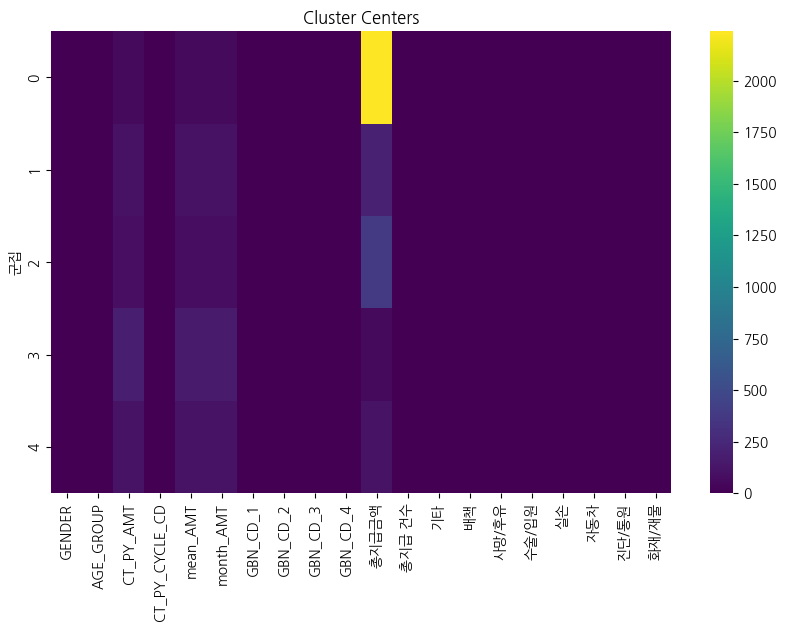

In [45]:
cluster_centers = fin_not0_2.groupby('군집').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, cmap='viridis')
plt.title('Cluster Centers')
plt.show()

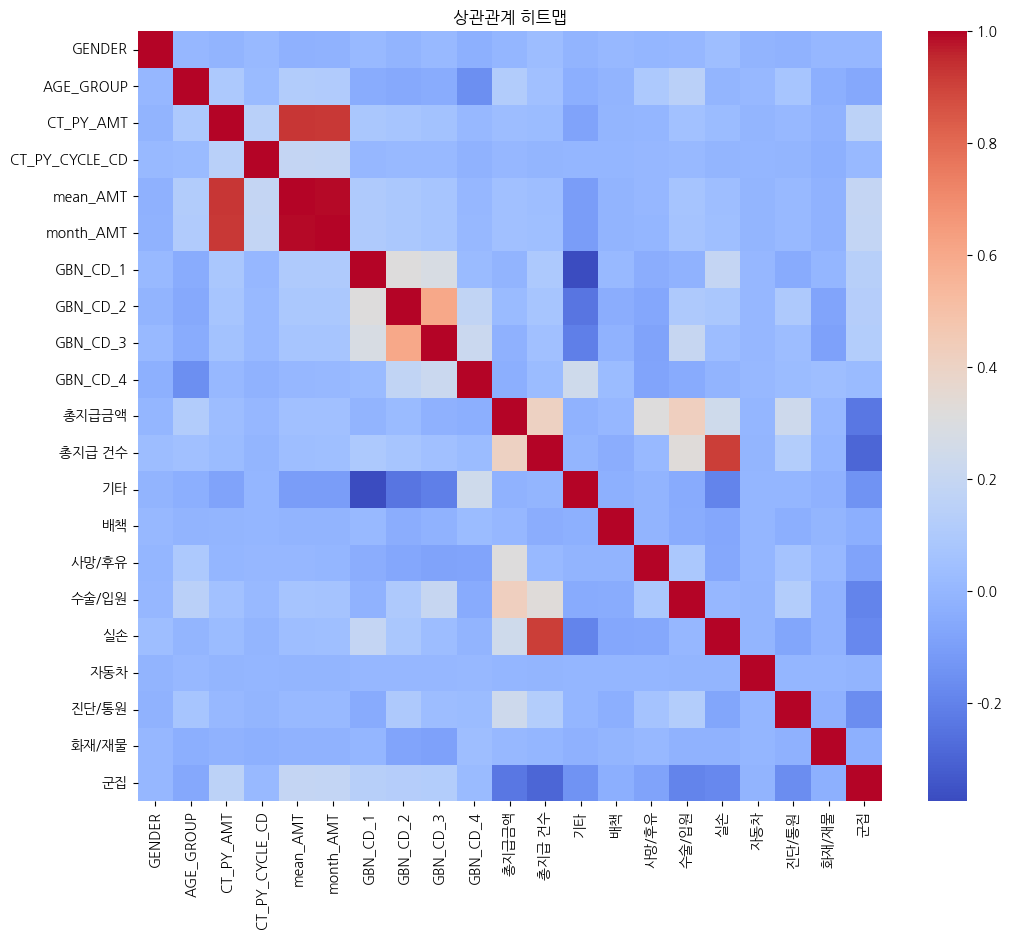

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(fin_not0_2.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')
plt.show()